In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [6]:
original_df = pd.read_csv("LeagueDatasetTest.csv")
df = pd.read_csv("LeagueDatasetTest.csv")
del df['gc_ratio_diff']
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['fpoints'].values
train_df.reset_index(drop=True)

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
0,2.43357,3.80577,1.54759,0,0,0,0.425210,0.539552,0.339927,0,...,0.262774,0.958042,348,361,160.500,6,1,1,0.02,11
1,2.79042,4.86015,1.68414,0,0,0,0.614486,0.684304,0.439646,0,...,0.359756,0.982036,1398,1320,584.536,10,3,3,0.20,12
2,2.76896,5.19340,1.80003,0,0,0,0.625843,0.723127,0.498497,0,...,0.354839,0.984127,1570,1550,668.491,10,5,4,2.27,19
3,2.57743,3.91490,1.49742,0,0,0,0.658936,0.762688,0.399090,0,...,0.301887,0.973753,982,1003,451.473,10,1,1,0.04,22
4,2.62082,3.85657,1.44699,0,0,0,0.567628,0.632663,0.330469,0,...,0.168582,0.970260,705,658,301.368,8,1,5,0.03,23
5,2.62592,3.95734,1.48258,0,0,0,0.669408,0.750143,0.370259,0,...,0.323308,0.975550,1074,1054,476.833,10,1,5,0.04,20
6,2.75676,5.28569,1.83332,0,0,0,0.666862,0.780424,0.538393,0,...,0.351133,0.982512,1734,1780,745.113,10,7,3,15.01,-1
7,2.77612,5.00594,1.73640,0,0,0,0.626067,0.712530,0.467955,0,...,0.329524,0.979478,1488,1446,627.097,10,4,2,0.07,21
8,2.76214,5.27681,1.82910,0,0,0,0.638727,0.748010,0.522163,0,...,0.354344,0.983250,1649,1661,704.968,10,6,2,15.01,-1
9,2.66276,4.62217,1.68386,0,0,0,0.545787,0.654206,0.427807,0,...,0.177711,0.973607,908,889,388.724,8,3,5,0.05,18


In [7]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
count,1560.000000,1560.000000,1560.000000,1560.0,1560.0,1560.0,1560.000000,1560.000000,1560.000000,1560.0,...,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,2.720697,4.801210,1.700058,0.0,0.0,0.0,0.599138,0.703942,0.454287,0.0,...,0.318479,0.977163,1271.908974,1261.229487,543.847831,9.112179,3.966026,3.024359,2.837821,16.732051
std,0.068977,0.482495,0.125523,0.0,0.0,0.0,0.080104,0.066483,0.065991,0.0,...,0.121722,0.006329,478.199945,492.226084,205.498164,1.659495,2.146226,1.419889,5.552728,7.500780
min,2.433570,3.688910,1.429080,0.0,0.0,0.0,0.414752,0.503628,0.278322,0.0,...,0.133005,0.950000,337.000000,338.000000,152.250000,6.000000,1.000000,1.000000,0.020000,-1.000000
25%,2.690520,4.474815,1.601555,0.0,0.0,0.0,0.530794,0.657219,0.402419,0.0,...,0.198813,0.973568,856.000000,828.500000,361.903000,8.000000,2.000000,2.000000,0.040000,12.000000
50%,2.747325,4.906935,1.717785,0.0,0.0,0.0,0.624851,0.711817,0.452214,0.0,...,0.321136,0.978533,1322.000000,1277.000000,577.763000,10.000000,4.000000,3.000000,0.050000,17.000000
75%,2.767950,5.239923,1.813327,0.0,0.0,0.0,0.661418,0.752591,0.510158,0.0,...,0.372454,0.982182,1660.000000,1680.000000,711.727750,10.000000,6.000000,4.000000,0.685000,22.000000
max,2.825540,5.468870,1.889450,0.0,0.0,0.0,0.720174,0.817758,0.562000,0.0,...,0.611881,0.987749,2134.000000,2233.000000,928.874000,11.000000,8.000000,5.000000,15.020000,39.000000


In [8]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
#     print(lst.reset_index())
#     print(copy_lst[average_feature])
    averages = []
#     print(copy_lst[21])
    for value in range(1, copy_lst[average_feature].max()+1):
        value_indices = np.where(copy_lst[average_feature]==value)
        total=0
        for value_index in value_indices[0]:
            total += copy_lst[average_result][value_index]
        if len(value_indices[0]) != 0:
            averages.append([value, total/len(value_indices[0])])
    return averages

fixtures_left = train_df['fixtures_left']
# print(getAverages(fixtures_left))
result = getAverages(train_df, 'number_of_teams', 'fpoints')
# result.keys()
print(result)


[[6, 11.11038961038961], [7, 12.693467336683417], [8, 14.995833333333334], [10, 18.147192716236724], [11, 20.477272727272727]]


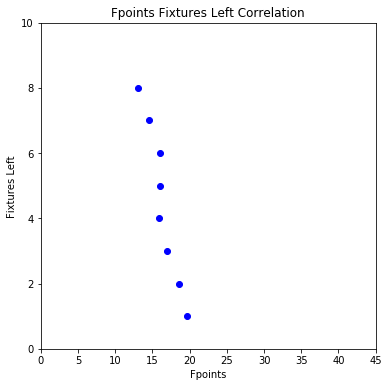

In [9]:
results = getAverages(train_df, 'fixtures_left', 'fpoints')
fpoints = []
fixtures_left = []
for item in results:
    fpoints.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Fpoints Fixtures Left Correlation')
plt.scatter(fpoints, fixtures_left, color='blue', marker='o')
plt.xlabel('Fpoints')
plt.ylabel('Fixtures Left')
plt.xlim(0,45.0)
plt.ylim(0,10)
plt.show()

[[6, 11.11038961038961], [7, 12.693467336683417], [8, 14.995833333333334], [10, 18.147192716236724], [11, 20.477272727272727]]


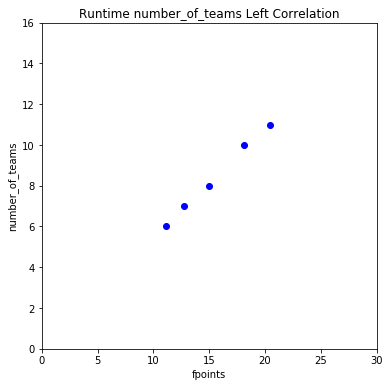

In [10]:
results = getAverages(train_df, 'number_of_teams', 'fpoints')
fpoints = []
number_of_teams = []
print(results)
for item in results:
    fpoints.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Runtime number_of_teams Left Correlation')
plt.scatter(fpoints, number_of_teams, color='blue', marker='o')
plt.xlabel('fpoints')
plt.ylabel('number_of_teams')
plt.xlim(0,30)
plt.ylim(0,16)
plt.show()

In [23]:
fixtures_left = train_df['fixtures_left']
print(np.where(fixtures_left==2))
# fixtures_left.reset_index()
print(fixtures_left.max())

(array([  0,   2,  22,  45,  50,  51,  52,  61,  63,  66,  71,  74,  77,
        84,  89,  94, 102, 118, 138, 144, 147, 156, 169, 171, 173, 176,
       178, 189, 191, 198, 207, 211, 212, 222, 224, 227, 230, 234, 250,
       262, 268, 272, 288, 304, 310, 311, 323, 333, 345, 363, 378, 387,
       395, 408, 415, 417, 426, 436, 438, 439, 440, 456, 462, 464, 466,
       474, 481, 486, 491, 509, 512, 516, 517, 523, 537, 538, 545, 551,
       554, 558, 577, 583, 587, 590, 593, 602, 604, 615, 619, 623, 627,
       628, 629, 646, 649, 656, 658, 668, 669, 671, 677, 681, 684, 695,
       698, 715, 716, 721, 723, 724, 729, 737, 747, 748, 760, 762, 764,
       769, 781, 782, 786, 795, 830, 833, 864, 866, 886, 887, 888, 889,
       890, 896, 904, 914, 915, 919, 920, 923, 937, 945, 948, 953, 955,
       956, 973, 975, 976, 985, 994, 998]),)
8


In [24]:
# plt.figure(figsize=(50,50))
# cor = train_df.corr()
# print(train_df.corr())
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

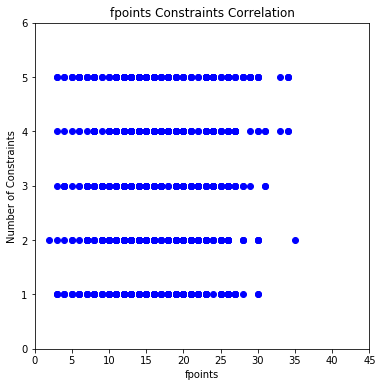

In [25]:
fpoints = train_df['fpoints']
number_of_constraints = train_df['number_of_constraints']

fig = plt.figure(figsize=(6,6))
plt.title('fpoints Constraints Correlation')
plt.scatter(fpoints, number_of_constraints, color='blue', marker='o')
plt.xlabel('fpoints')
plt.ylabel('Number of Constraints')
plt.xlim(0,45.0)
plt.ylim(0,6)
plt.show()

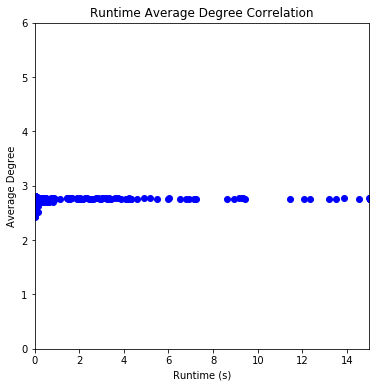

In [26]:
runtime = train_df['runtime']
c_avg_deg_cons = train_df['c_avg_deg_cons']

fig = plt.figure(figsize=(6,6))
plt.title('Runtime Average Degree Correlation')
plt.scatter(runtime, c_avg_deg_cons, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('Average Degree')
plt.xlim(0,15.0)
plt.ylim(0,6)
plt.show()

In [27]:
# list(df.columns)
# plt.figure(figsize=(12,10))
# cor = train_df.corr()
# print(train_df.corr())
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [28]:
train_df = train_df.take(np.random.permutation(len(train_df)))

In [29]:
train_y = train_df['fpoints'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

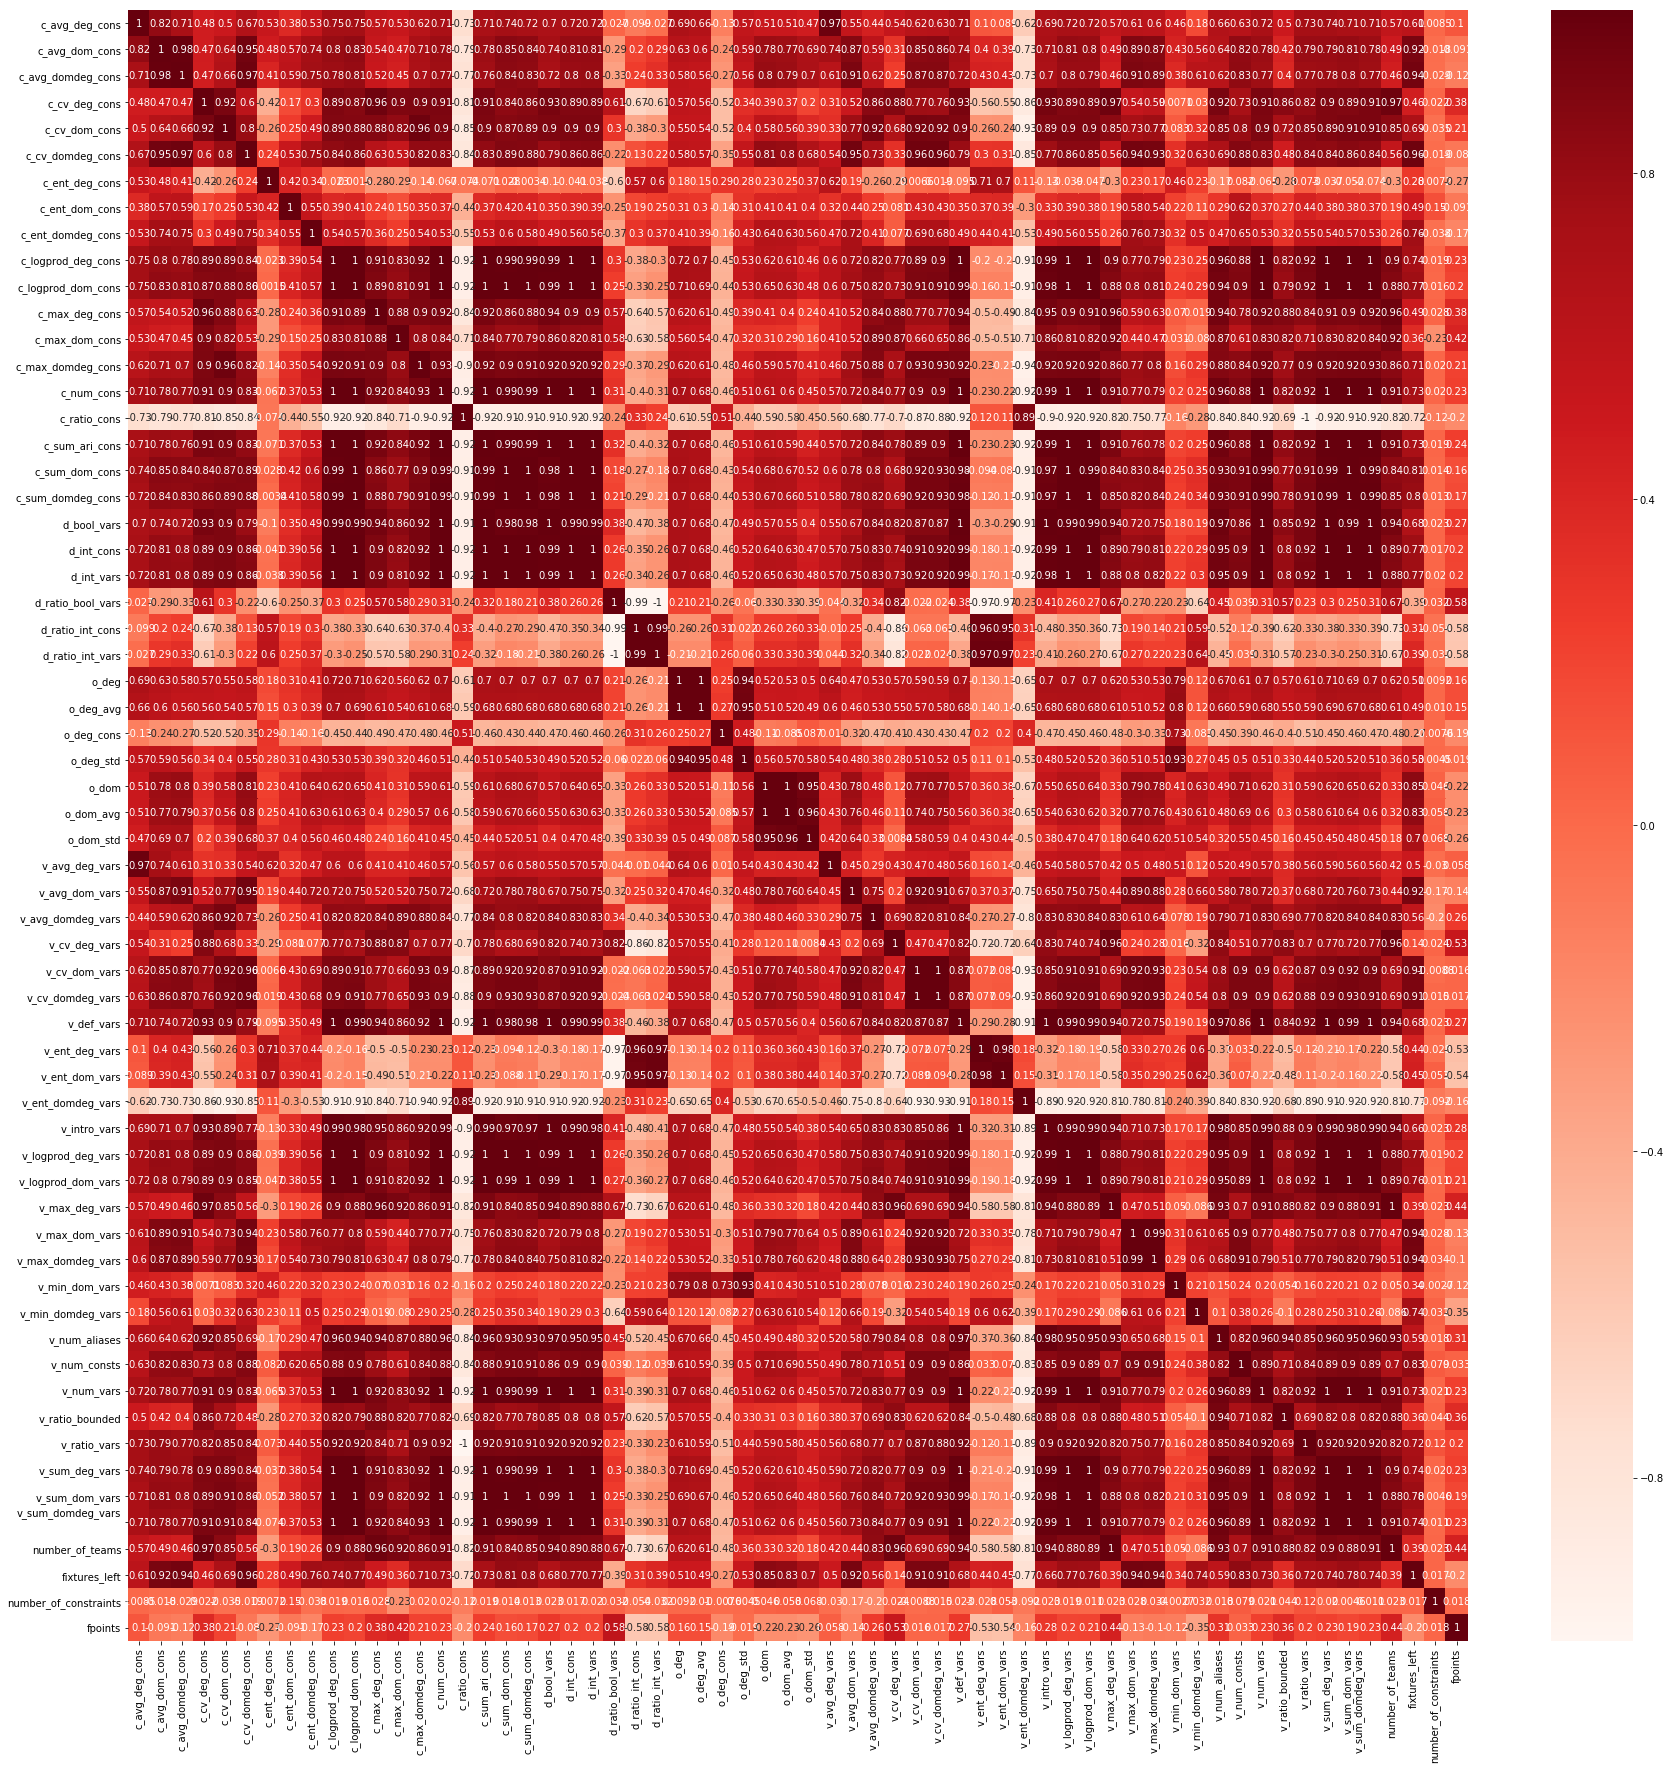

In [33]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['fpoints'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['fpoints']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', LinearRegression())
])

In [16]:
# train_df.isnull().sum()
print([i for i in train_df.columns if train_df[i].isnull().any()])
# train_df.isna().any()

[]


In [17]:
league_dt = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("estimator", DecisionTreeRegressor(max_depth=40))
])

model = league_dt.fit(train_df, train_y)

In [34]:
np.mean(cross_val_score(league_dt, test_df, test_y, scoring='neg_mean_absolute_error', cv=10))

-5.89375

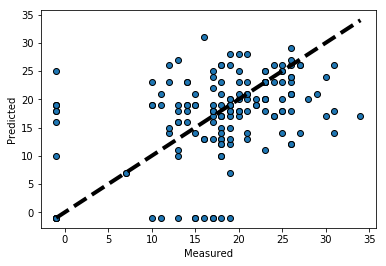

In [35]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## np.mean(cross_val_score(league_dt, test_df, test_y, scoring='mean_squared_error', cv=10))

In [19]:
np.mean(cross_val_score(league_dt, test_df, test_y, scoring='r2', cv=10))

-0.9420431941918563

In [20]:
from sklearn import metrics

In [21]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])